In [ ]:
###Week03 ASSIGNMENT

In [ ]:
# Business Goal
#Given the forecasted weather conditions,
#how many bicycles can we expect to be rented out (city-wide)
#this Saturday at 2pm?

In [167]:
# Get Data
import pandas as pd
bikes = pd.read_csv('train.csv')
bikes.info()

bikes_test = pd.read_csv('test.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
###X variables
#datetime - hourly date + timestamp  
#season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
#holiday - whether the day is considered a holiday
#workingday - whether the day is neither a weekend nor holiday
#weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
#temp - temperature in Celsius
#atemp - "feels like" temperature in Celsius
#humidity - relative humidity
#windspeed - wind speed

###Variables to drop
#casual - number of non-registered user rentals initiated
#registered - number of registered user rentals initiated

###Y variable
#count - number of total rentals 

In [37]:

bikes.shape

(10886, 12)

<AxesSubplot:xlabel='datetime', ylabel='count'>

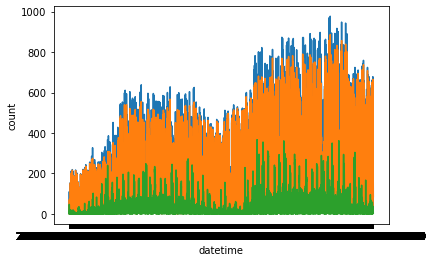

In [5]:
import matplotlib as plt
import seaborn as sns

sns.lineplot(data=bikes, x = bikes['datetime'], y = bikes['count'])
sns.lineplot(data=bikes, x = bikes['datetime'], y = bikes['registered'])
sns.lineplot(data=bikes, x = bikes['datetime'], y = bikes['casual'])

In [168]:
bikes = bikes.drop(['casual', 'registered'], axis=1)
bikes.shape

(10886, 10)

In [45]:
bikes.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32


In [54]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


<AxesSubplot:>

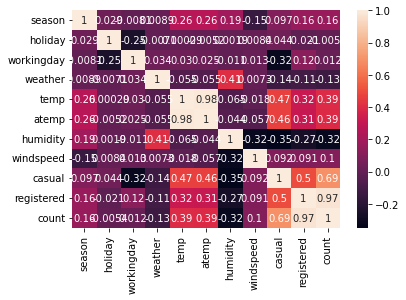

In [8]:
sns.heatmap(bikes.corr(), annot= True)

In [169]:
# Train Validation data split
# Train: 0-19 of every month --> bikes
# Test: 20-end of every month --> bikes_test

bikes['datetime']= pd.to_datetime(bikes['datetime'])
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [170]:
bikes['day']= bikes['datetime'].dt.day
bikes['day'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [29]:
df_train = bikes[(bikes['day']<= 19)]
df_train['day'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [44]:
#This was really not needed, the data is already split.
bikes_test.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [46]:
bikes_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [48]:
bikes_test.shape #Count and the redundant variables are already removed

(6493, 9)

In [171]:
# EDA
#bikes.info()
##Extract features from daytime column 
bikes['weekday'] = bikes['datetime'].dt.day_name()
bikes['hour']= bikes['datetime'].dt.hour
bikes['week']= bikes['datetime'].dt.isocalendar().week
bikes['month']= bikes['datetime'].dt.month
bikes['year']= bikes['datetime'].dt.year


In [58]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,weekday,hour,week,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,1,Saturday,0,52,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1,Saturday,1,52,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,1,Saturday,2,52,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,1,Saturday,3,52,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,1,Saturday,4,52,1,2011


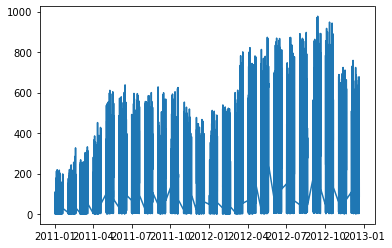

In [12]:
#Plot small sections of the data 

import matplotlib.pyplot as plt
plt.plot(bikes['datetime'], bikes['count'])

<AxesSubplot:xlabel='datetime', ylabel='count'>

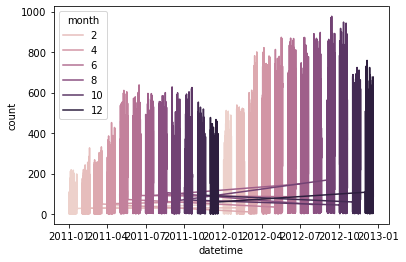

In [61]:
sns.lineplot(x=bikes['datetime'], y=bikes['count'], hue=bikes['month'], data=bikes)

<AxesSubplot:xlabel='weather', ylabel='count'>

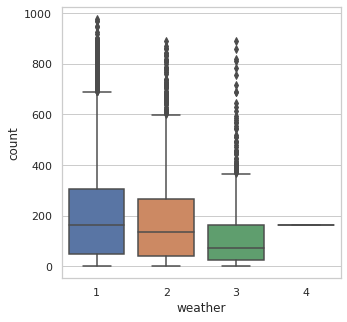

In [149]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(5,5))
sns.boxplot(data=bikes, y='count', x='weather')

In [151]:
bikes[['count','weather']].groupby(by='weather').describe()

count                                                           
          count        mean         std    min    25%    50%    75%    max
weather                                                                   
1        7192.0  205.236791  187.959566    1.0   48.0  161.0  305.0  977.0
2        2834.0  178.955540  168.366413    1.0   41.0  134.0  264.0  890.0
3         859.0  118.846333  138.581297    1.0   23.0   71.0  161.0  891.0
4           1.0  164.000000         NaN  164.0  164.0  164.0  164.0  164.0

<AxesSubplot:xlabel='humidity', ylabel='count'>

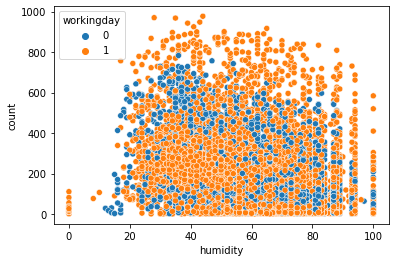

In [63]:
sns.scatterplot(x=bikes['humidity'], y=bikes['count'], hue=bikes['workingday'], data=bikes)

In [64]:
bikes_all = pd.read_csv('train.csv', parse_dates=True, index_col=0)
climate = bikes_all[['count','temp', 'atemp','humidity', 'windspeed','weather']]
hmd = bikes_all[['count', 'humidity']]
tmp = bikes_all[['count','temp', 'atemp']]
wind = bikes_all[['count','weather']]
wth = bikes_all[['count','weather']]

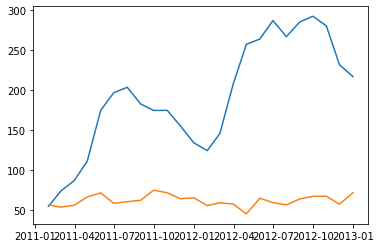

In [65]:
hmd_t = hmd.resample('M').mean()
plt.plot(hmd_t)

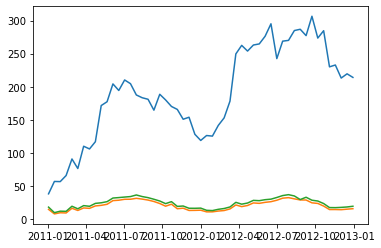

In [66]:
tmp_t = tmp.resample('2W').mean()
plt.plot(tmp_t)

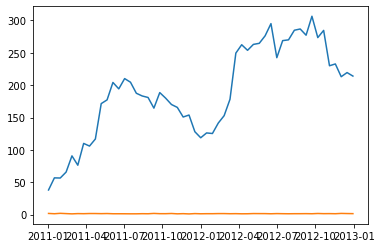

In [67]:
wind_t = wind.resample('2W').mean()
plt.plot(wind_t)

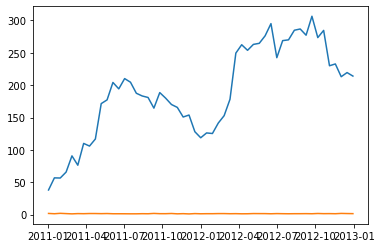

In [168]:
wth_t = wth.resample('2W').mean()
plt.plot(wth_t)

In [138]:
#Group by a time feature and observe grouped means 

In [114]:
bikes['humidity'].groupby(bikes['season']).describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,56.297841,20.158420,0.0,41.0,53.0,70.0,100.0
2,2733.0,60.852909,20.179655,16.0,45.0,61.0,78.0,100.0
3,2733.0,64.123674,17.217859,17.0,51.0,66.0,78.0,100.0
4,2734.0,66.173738,17.813446,16.0,52.0,66.0,81.0,100.0


In [115]:
bikes['weather'].groupby(bikes['season']).describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,1.424423,0.635439,1.0,1.0,1.0,2.0,4.0
2,2733.0,1.422978,0.638858,1.0,1.0,1.0,2.0,3.0
3,2733.0,1.366630,0.614799,1.0,1.0,1.0,2.0,3.0
4,2734.0,1.459766,0.642749,1.0,1.0,1.0,2.0,3.0


In [153]:
bikes['temp'].groupby(bikes['season']).describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,12.530491,5.186492,0.82,9.02,12.30,16.40,29.52
2,2733.0,22.823483,5.159616,9.84,18.86,22.96,26.24,38.54
3,2733.0,28.789111,3.898157,15.58,26.24,28.70,31.16,41.00
4,2734.0,16.649239,4.742176,5.74,13.12,16.40,20.50,30.34


In [156]:
bikes['atemp'].groupby(bikes['season']).describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,15.228956,6.092218,0.760,10.605,14.395,20.455,32.575
2,2733.0,26.647098,5.491321,11.365,22.725,26.515,31.060,43.940
3,2733.0,32.540783,4.594888,12.120,30.305,33.335,35.605,45.455
4,2734.0,20.059909,5.264197,7.575,15.910,20.455,24.240,34.090


In [155]:
bikes['windspeed'].groupby(bikes['season']).describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,14.636978,9.150257,0.0,7.0015,12.9980,19.9995,51.9987
2,2733.0,13.405607,7.992956,0.0,7.0015,12.9980,19.0012,47.9988
3,2733.0,11.508862,7.160605,0.0,7.0015,11.0014,15.0013,56.9969
4,2734.0,11.678147,7.842632,0.0,7.0015,11.0014,16.9979,43.0006


In [172]:
climate_t = climate.resample('3M').mean()
climate_t

,count,temp,atemp,humidity,windspeed,weather
datetime,,,,,,
2011-01-31,54.645012,8.633782,10.767981,56.308585,13.749830,1.440835
2011-04-30,90.642910,14.413007,17.404250,58.648107,15.796123,1.489235
2011-07-31,191.766813,26.562485,30.539236,63.372076,12.082084,1.330409
2011-10-31,177.362170,25.240850,28.975433,69.509531,11.652101,1.498534
2012-01-31,138.024908,13.312234,16.270044,61.660806,12.757919,1.362637
2012-04-30,203.753666,16.538871,19.839388,53.826979,14.156466,1.381232
2012-07-31,272.777778,27.157705,31.141776,60.125731,11.693126,1.397661
2012-10-31,286.225877,25.727500,29.327602,66.089912,11.503934,1.416667
2013-01-31,224.509330,14.549374,17.709012,64.406147,12.350549,1.488474


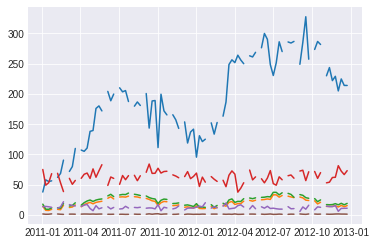

In [194]:
climate_t = climate.resample('W').mean()
plt.plot(climate_t)

In [ ]:
#Baseline Model 

In [105]:
#First impute missing Data, scale , hot enconde and bin variables 
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#No missing data to be imputed 
bikes.isna().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
day           0
weekday       0
hour          0
week          0
month         0
year          0
dtype: int64

In [110]:
# Lets Scale data -> temp, atemp, humidity, windspeed

#Option 1: MinMax Scaler (data ranges btw 0 and 1)
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
cols = bikes[['temp', 'atemp', 'humidity', 'windspeed']]
scaler_minmax.fit(cols)               # learn the min and max of the data
t_minmax = scaler.transform(cols)     # apply the transformation to the dat
cols_scaled_minmax = pd.DataFrame(t_minmax, columns=cols.columns)
cols_scaled_minmax.head()
cols_scaled_minmax.describe()


,temp,atemp,humidity,windspeed
count,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.483098,0.512252,0.618865,0.224563
std,0.193917,0.189610,0.192450,0.143245
min,0.000000,0.000000,0.000000,0.000000
25%,0.326531,0.355856,0.470000,0.122840
50%,0.489796,0.525338,0.620000,0.228047
75%,0.632653,0.677928,0.770000,0.298225
max,1.000000,1.000000,1.000000,1.000000


In [111]:
#OPtion 2: Standard Scalar
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
cols = bikes[['temp', 'atemp', 'humidity', 'windspeed']]
scaler.fit(cols)               # learn the min and max of the data
t = scaler.transform(cols)     # apply the transformation to the dat
cols_scaled_std = pd.DataFrame(t, columns=cols.columns)
cols_scaled_std.head()
cols_scaled_std.describe()


,temp,atemp,humidity,windspeed
count,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.483098,0.512252,0.618865,0.224563
std,0.193917,0.189610,0.192450,0.143245
min,0.000000,0.000000,0.000000,0.000000
25%,0.326531,0.355856,0.470000,0.122840
50%,0.489796,0.525338,0.620000,0.228047
75%,0.632653,0.677928,0.770000,0.298225
max,1.000000,1.000000,1.000000,1.000000


In [220]:
X_bs['temp_scaled'] = cols_scaled_std['temp']
X_bs['atemp_scaled'] = cols_scaled_std['atemp']
X_bs['humidity_scaled']= cols_scaled_std['humidity']
X_bs['windspeed_scaled']= cols_scaled_std['windspeed']

#bikes = bikes.join (X_bs[['temp_scaled','atemp_scaled','humidity_scaled','windspeed_scaled']], how='outer')
bikes.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          10886 non-null  datetime64[ns]
 1   season            10886 non-null  int64         
 2   holiday           10886 non-null  int64         
 3   workingday        10886 non-null  int64         
 4   weather           10886 non-null  int64         
 5   temp              10886 non-null  float64       
 6   atemp             10886 non-null  float64       
 7   humidity          10886 non-null  int64         
 8   windspeed         10886 non-null  float64       
 9   count             10886 non-null  int64         
 10  day               10886 non-null  int64         
 11  weekday           10886 non-null  object        
 12  hour              10886 non-null  int64         
 13  week              10886 non-null  UInt32        
 14  month             1088

In [119]:
#Create Hot encoders and Bins 
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,hour,week,month,year
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,9.992559,11.541613,25.917784,6.521495,2011.501929
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,5.476608,6.915838,15.017269,3.444373,0.500019
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2011.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,5.000000,6.000000,14.000000,4.000000,2011.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,10.000000,12.000000,26.000000,7.000000,2012.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,15.000000,18.000000,40.000000,10.000000,2012.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,19.000000,23.000000,52.000000,12.000000,2012.000000


In [172]:
#season, weather

from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder(sparse=False, handle_unknown='ignore')
cols = bikes[['season', 'weather']]
ohc.fit(cols)
t= ohc.transform(cols)

ohc_features = pd.DataFrame(t, columns=ohc.get_feature_names())
ohc_features.head()



,x0_1,x0_2,x0_3,x0_4,x1_1,x1_2,x1_3,x1_4
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [173]:
ohc_features = ohc_features.rename(columns= {"x0_1":"spring",
                                             "x0_2":"summer",
                                             "x0_3":"autumn",
                                             "x0_4":"winter",
                                             "x1_1":"good_weather",
                                             "x1_2":"cloudy_weather",
                                             "x1_3":"rainy_weather",
                                             "x1_4":"stormy_weather"})
ohc_features.head()
                                            
bikes = bikes.join(ohc_features, how='outer')
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,month,year,spring,summer,autumn,winter,good_weather,cloudy_weather,rainy_weather,stormy_weather
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,...,1,2011,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,...,1,2011,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,...,1,2011,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,...,1,2011,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,...,1,2011,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [182]:
#humidity (high vs non high), windspeed(high, non high), temperature (cold, mild, hot) 

from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=3, encode='onehot-dense', strategy='quantile')
columns_bins = bikes[['temp', 'atemp', 'humidity', 'windspeed']]
kbins.fit(columns)
t_bins = kbins.transform(columns_bins)
t_bins

# create a DataFrame
df_bins = pd.DataFrame(t_bins)
df_bins.head()


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [184]:
df_bins.columns = ["low_temp", "mild_temp","high_temp",
                   "low_atemp", "mild_atemp","high_atemp",
                   "low_humidity", "medium_humidity","high_humidity",
                   "low_windspeed","mild_windspeed","high_windspeed"]
df_bins.head()

,low_temp,mild_temp,high_temp,low_atemp,mild_atemp,high_atemp,low_humidity,medium_humidity,high_humidity,low_windspeed,mild_windspeed,high_windspeed
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [185]:
bikes = bikes.join(df_bins, how='outer')
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,high_temp,low_atemp,mild_atemp,high_atemp,low_humidity,medium_humidity,high_humidity,low_windspeed,mild_windspeed,high_windspeed
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


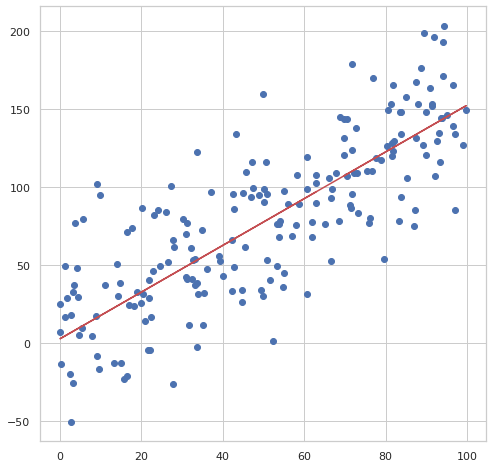

In [270]:
# Create random datapoints
x = np.random.uniform(low=0, high=100, size=200)
noise = np.random.normal(loc=0, scale=30, size=200)
w1 = 1.5
w0 = 2.5
y = w1*x + w0 + noise

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x, y);
ax.plot(x, w1*x+w0, c='r');

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


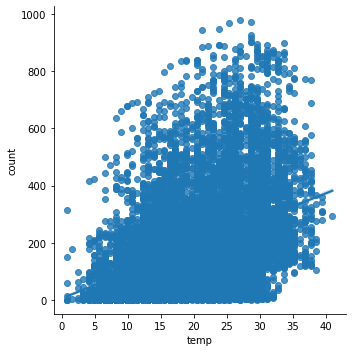

In [14]:
sns.lmplot(data=bikes, x='temp', y='count')

In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


m = LinearRegression()
X_bs= bikes[['season','temp', 'humidity', 'hour', 'year']]
y = bikes['count']

m.fit(X_bs,y)

ypred_bs =m.predict(X_bs)
rmse_bs = np.sqrt(mean_squared_error(y,ypred_bs))
r2_bs = r2_score(y,ypred_bs)
print(round(rmse_bs,4), round(r2_bs,4))


142.031 0.3852


In [19]:
m.coef_, m.intercept_

(array([21.85019846,  6.6909426 , -2.10385865,  7.81719727, 82.28066016]),
 -165466.28873609958)

In [83]:
#fig, ax = plt.subplots(figsize=(8,8))
#ax.scatter(X, y) # Real Data 
#ax.plot(X, m.coef_[0]*X[['temp']]+m.intercept_, c='g') #Predictive Model 

In [191]:
#using stats model

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Linear Regression 
results_bs = smf.ols('np.log(count)~ year + hour + temp + humidity + day + workingday + month', data=bikes).fit()
print(results_bs.summary())


                            OLS Regression Results                            
Dep. Variable:          np.log(count)   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     1434.
Date:                Thu, 09 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:41:00   Log-Likelihood:                -16221.
No. Observations:               10886   AIC:                         3.246e+04
Df Residuals:                   10878   BIC:                         3.252e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -879.1215     41.640    -21.112      0.0

In [126]:
# GlM Binomial Negative 

bikes.exog = sm.add_constant(X, prepend=False)
bikes.endog = y
glm_binom = sm.GLM(bikes.endog, bikes.exog, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())




                 Generalized Linear Model Regression Results                  
Dep. Variable:                  count   No. Observations:                10886
Model:                            GLM   Df Residuals:                    10880
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                   -inf
Date:                Wed, 08 Sep 2021   Deviance:                   1.7449e+08
Time:                        20:30:06   Pearson chi2:                 3.39e+24
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
season      3.931e+17   6.11e+05   6.43e+11      0.0

/home/rita/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/rita/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +


In [22]:
from sklearn.linear_model import PoissonRegressor

p = PoissonRegressor(alpha=0.65)
p.fit(X_bs, y)
p.predict(X_bs)

ypred_po =p.predict(X_bs)
rmse_po = np.sqrt(mean_squared_error(y,ypred_po))
r2_po = r2_score(y,ypred_po)
print(round(rmse_po,4), round(r2_po,4))


143.1548 0.3754


/home/rita/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_glm/glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


In [ ]:
#Assess Linear Regression Assumptions 
#IMPORTANT FOR PREDICTION
# Ubiasedness (1-4): unbiased estimation of weights and y (ypred = ytrue)
# The Gauss Markov Theorem (1-5): estimator by OLS is B.L.U.E. (lowest variance)

#IMPORTANT FOR MEASURING SIZE EFFECTS 
# Statistical Inference (1-7)

In [20]:
### Assumption 1: Linear Relationship 
##We verify that the count of bikes does not have a linear relationship with all features (see pairplots below)

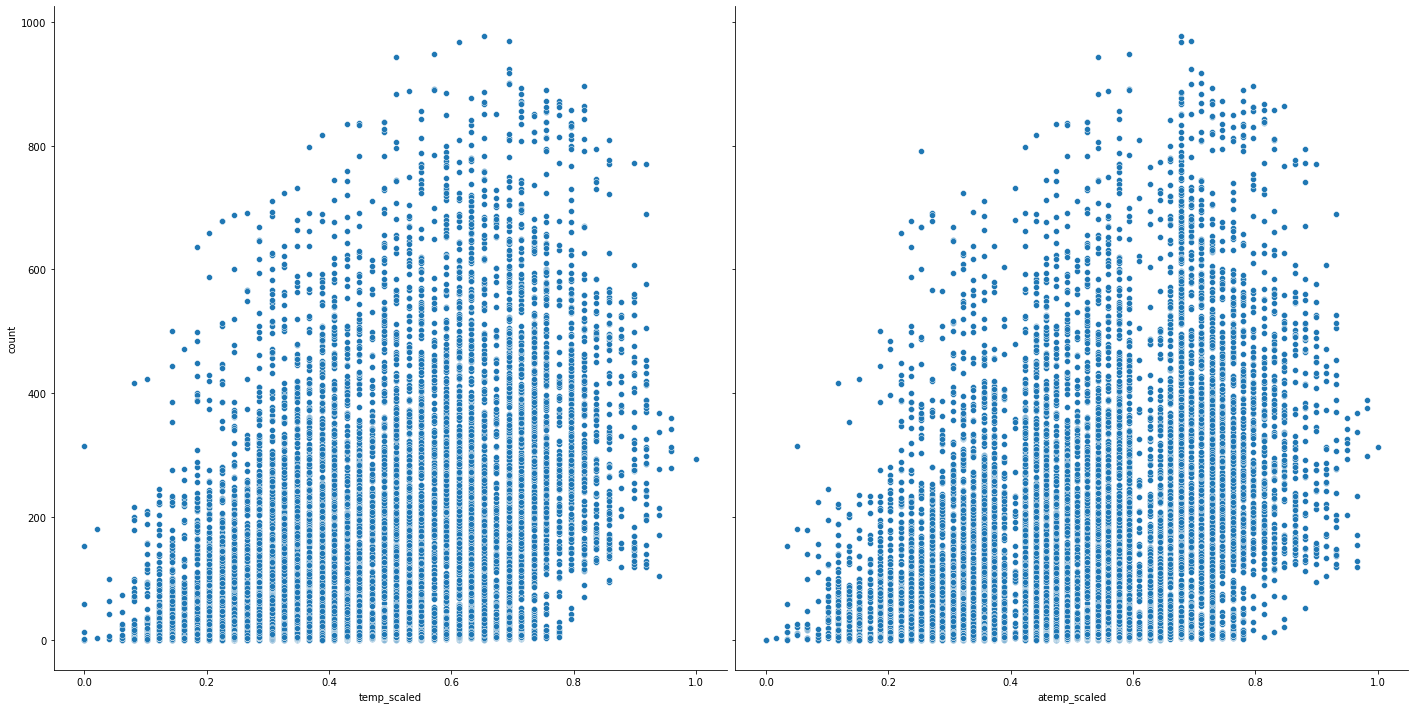

In [288]:
sns.pairplot(bikes,
             y_vars=['count'],
             x_vars=['temp_scaled','atemp_scaled'],
             height = 10
            )
#Number of bikes seems to have a quadratic relationship with temperature

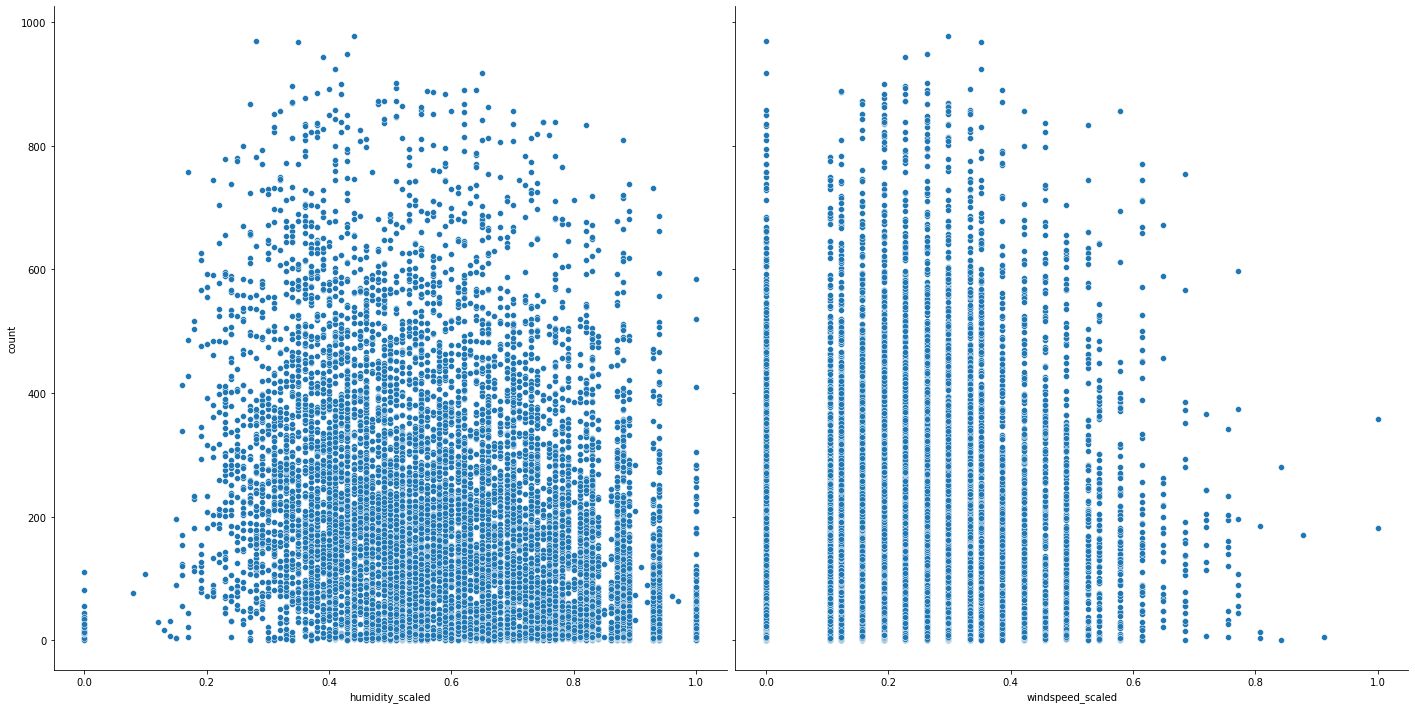

In [289]:
sns.pairplot(bikes,
             y_vars=['count'],
             x_vars=['humidity_scaled','windspeed_scaled'],
             height = 10
            )

#The relationship between number of bikes and humidity/windspeed does not seem to be linear for all values

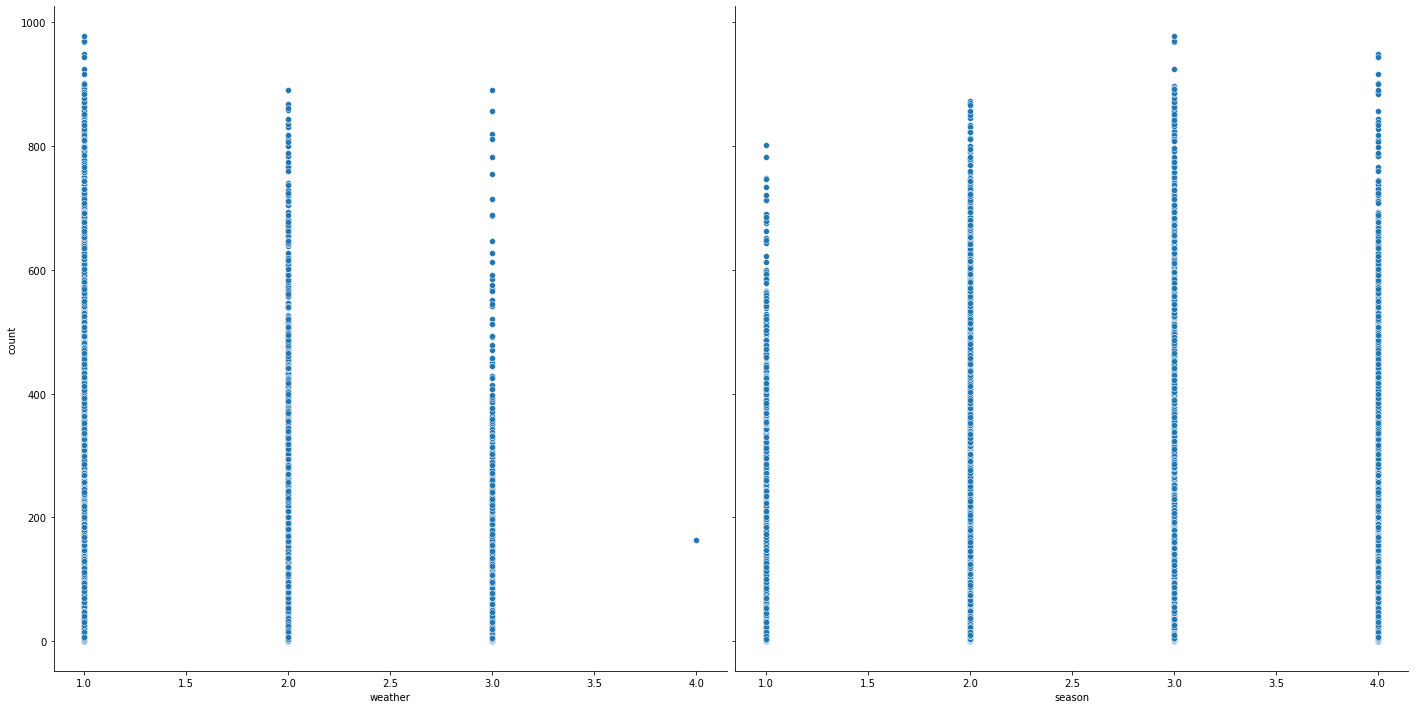

In [86]:
sns.pairplot(bikes,
             y_vars=['count'],
             x_vars=['weather','season'],
             height = 10
            )

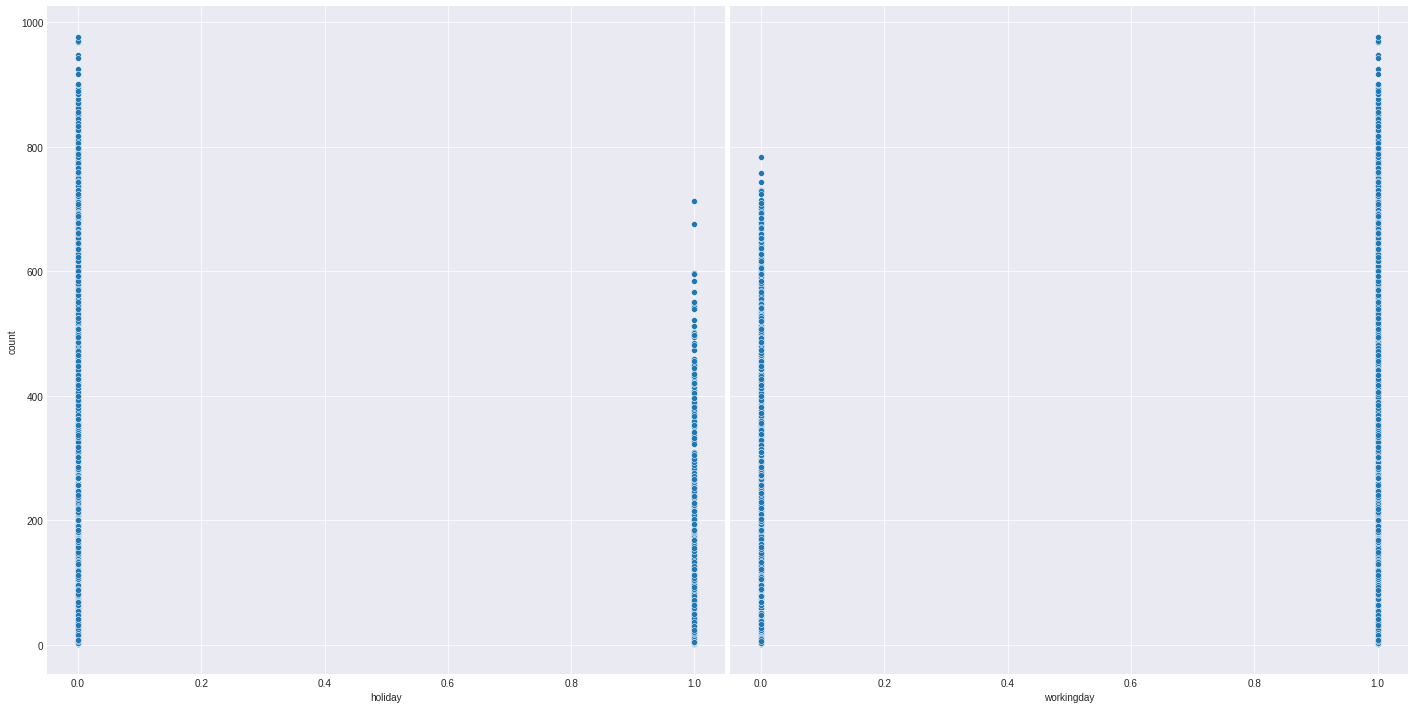

In [217]:
sns.pairplot(bikes,
             y_vars=['count'],
             x_vars=['holiday','workingday'],
             height = 10
            )
#I think the number of bikes has a fairly linear relationship with weather and season

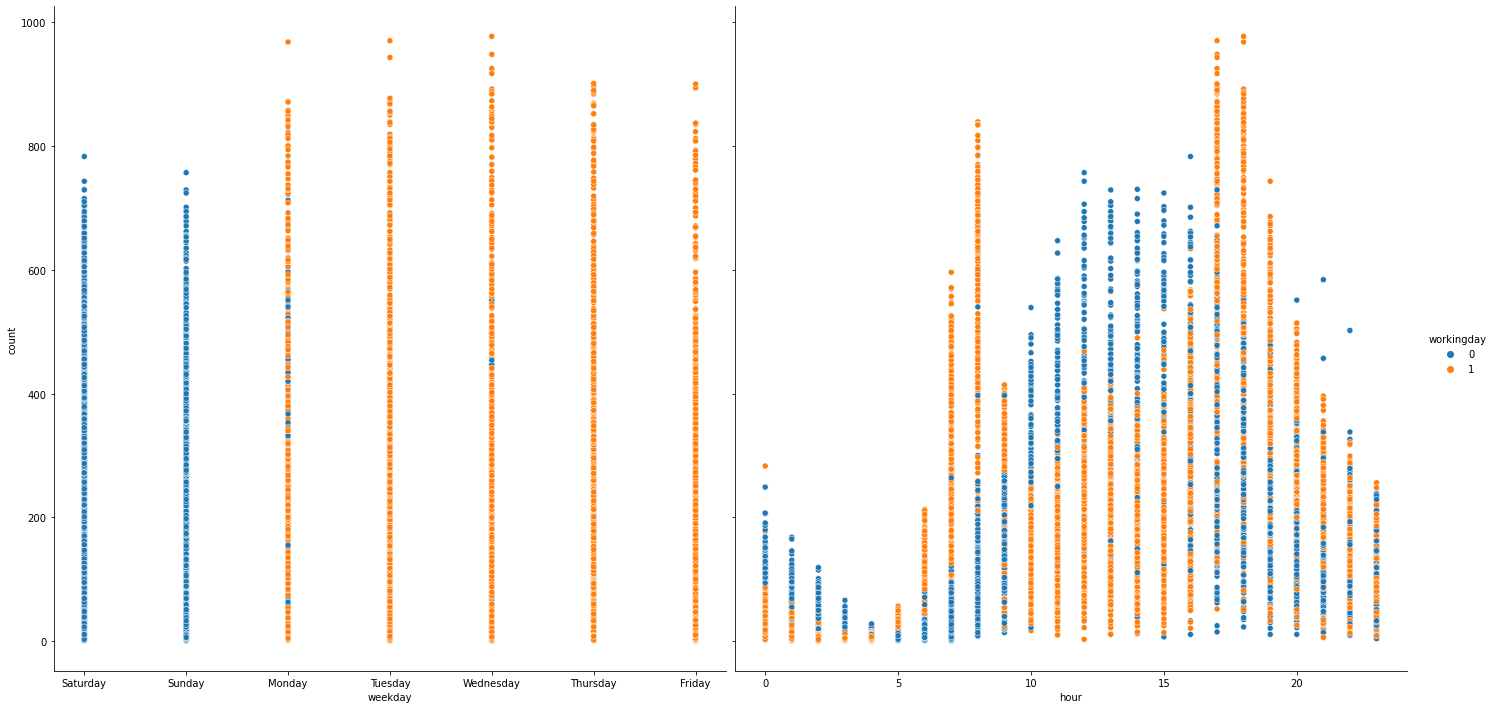

In [292]:
sns.pairplot(bikes,
             y_vars='count',
             x_vars=['weekday','hour'],
             height = 10,
             hue='workingday',
             data=bikes
            )

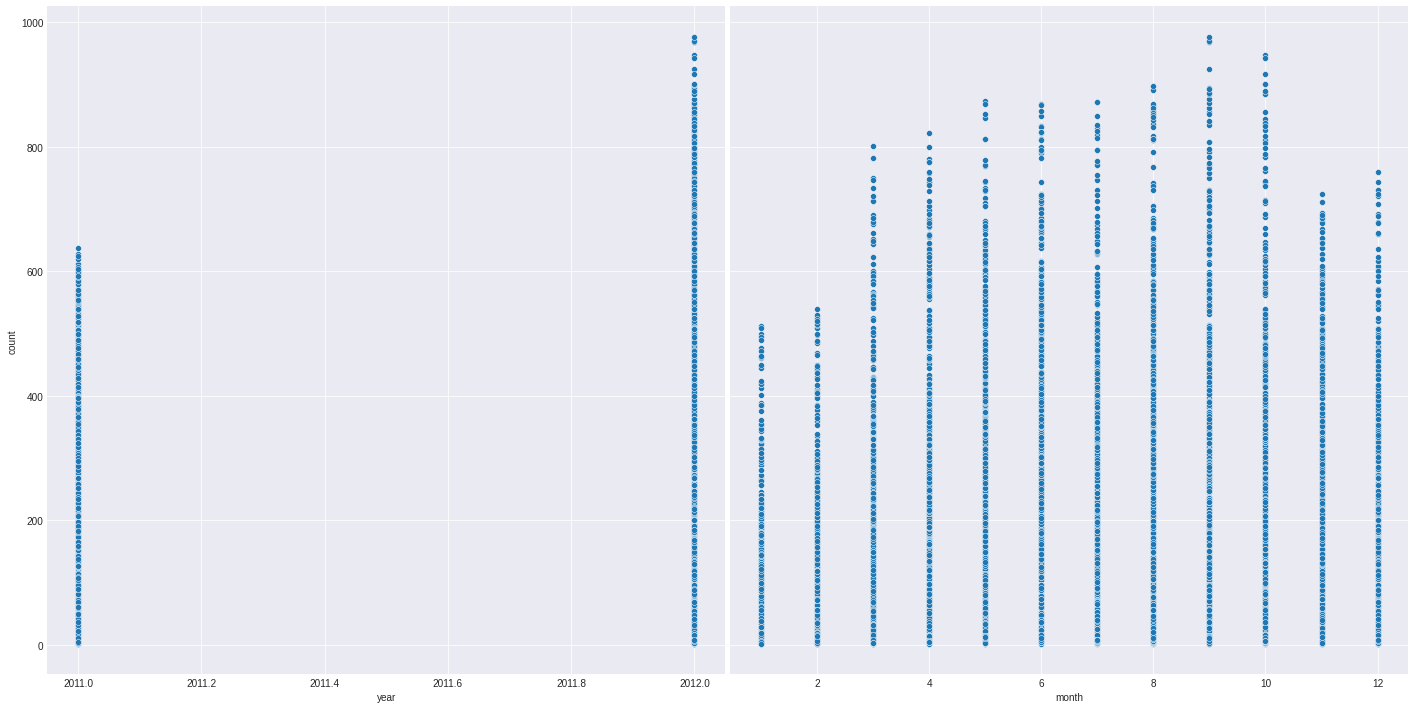

In [219]:
sns.pairplot(bikes,
             y_vars=['count'],
             x_vars=['year','month'],
             height = 10
            )
#number of rented bikes does not have a linear relationship with time variables (excpet maybe workingday)

In [ ]:
### Assumption 2: Random Sampling
# we assume the data was correctly collected


In [221]:
### Assumption 3: Sample variation in regressors 
#ensure each regressor is not made of the same value (has variance in it)
climate.describe()

,count,temp,atemp,humidity,windspeed,weather
count,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,191.574132,20.23086,23.655084,61.886460,12.799395,1.418427
std,181.144454,7.79159,8.474601,19.245033,8.164537,0.633839
min,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,42.000000,13.94000,16.665000,47.000000,7.001500,1.000000
50%,145.000000,20.50000,24.240000,62.000000,12.998000,1.000000
75%,284.000000,26.24000,31.060000,77.000000,16.997900,2.000000
max,977.000000,41.00000,45.455000,100.000000,56.996900,4.000000


In [223]:
bikes[['workingday','holiday','season','year','month','season','hour','day','weekday']].nunique()

workingday     2
holiday        2
season         4
year           2
month         12
season         4
hour          24
day           19
weekday        7
dtype: int64

In [ ]:
### Assumption 4: Zero Conditional Mean 
#We don't want the residuals to grow with the input variable
#To do: Plot the correlations with the residuals

<AxesSubplot:xlabel='hour', ylabel='count'>

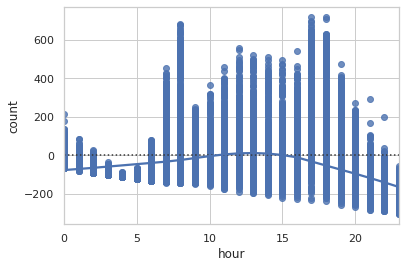

In [88]:
sns.set_theme(style="whitegrid")

sns.residplot(x=bikes['hour'], y=bikes['count'],data=bikes, lowess=True)

<AxesSubplot:xlabel='temp', ylabel='count'>

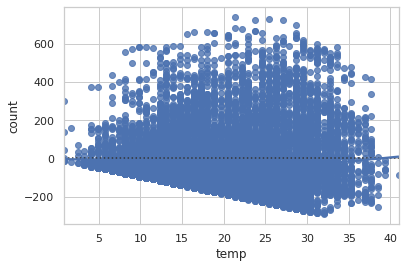

In [113]:
sns.residplot(x=bikes['temp'], y=bikes['count'], data=bikes, lowess=True)

<AxesSubplot:xlabel='humidity', ylabel='count'>

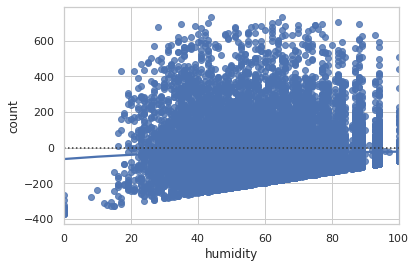

In [115]:
sns.residplot(bikes['humidity'], bikes['count'], data=bikes, lowess=True)

<AxesSubplot:xlabel='season', ylabel='count'>

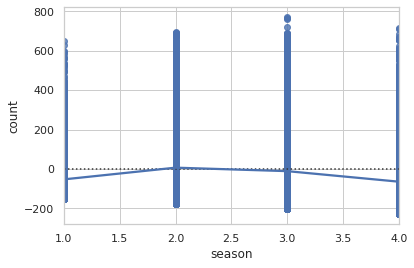

In [117]:
sns.residplot(x=bikes['season'], y=bikes['count'], data=bikes,lowess=True)

<AxesSubplot:xlabel='workingday', ylabel='count'>

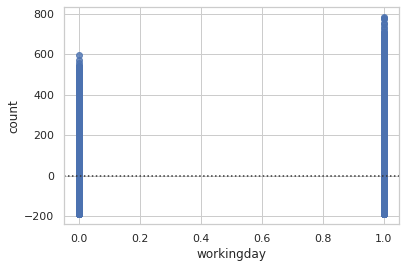

In [242]:
sns.residplot(bikes['workingday'], bikes['count'], data=bikes)

<AxesSubplot:xlabel='month', ylabel='count'>

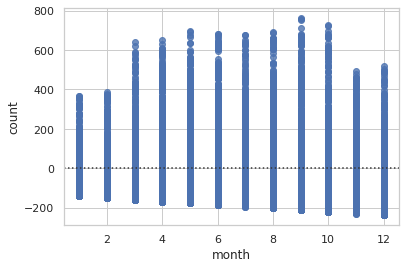

In [243]:
sns.residplot(bikes['month'], bikes['count'], data=bikes)

<AxesSubplot:>

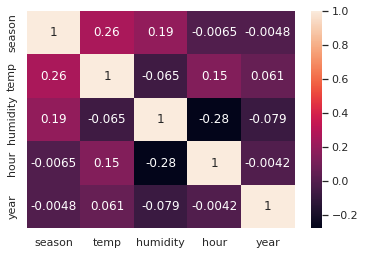

In [89]:
sns.heatmap(X.corr(), annot=True)

In [192]:
### Assumption 5: Homoscedasticity (constant var at every level of x)
### check for fitted value vs residual plot 
### Solution 1: Transform y (ex: log transformation)
### Solution 2: Redefine X (ex: use rate instead of raw value)
### Solution 3: use weighted regression
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan

name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
test = sms.het_breuschpagan(results_bs.resid, results_bs.model.exog)
het_bp = pd.DataFrame(lzip(name, test))
het_bp



,0,1
0,Lagrange multiplier statistic,1469.391825
1,p-value,0.000000
2,f-value,242.490168
3,f p-value,0.000000


/home/rita/anaconda3/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


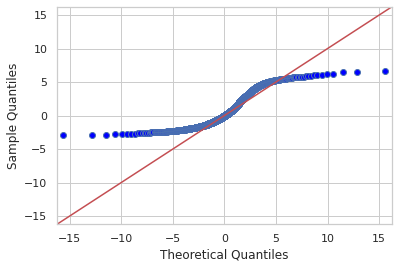

In [96]:
### Assumption 6: Normally distribuited residuals
### Note that in large samples this assumption is not needed because we can use the Central Limit Theorem (CLT) to establish asymptotic normality of the errors.
### Check this assumption by using Q-Q plots + histogram of residuals
### You can use formal tests if your sample size is not too big (jarque-bera)
### Step 1: verify outliers, if they are having a big impact and if they are real values
### Step 2: Apply a non linear transformation to Y and/or X

import scipy.stats as stats
res = results.resid 
fig = sm.qqplot(res, stats.t, distargs=(4,), fit=True, line='45')
plt.show()





In [97]:
### Assumption 7: No Multicolinearity
### Use Variance Inflation Factor (VIF)to measure multicolinearity (greater than 5 = high level)
### Solution: drop one of the multicolinear features 

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif.round(1)




,features,VIF
0,season,6.8
1,temp,8.6
2,humidity,12.9
3,hour,4.2
4,year,25.4


In [98]:
### Assumption 8: No autocorrelation of residuals 
### Mostly relevant when working with time series
### Use Durbin-Watson test + check the residuals time series plot
### Solution 1a (positive corr): add lags of y and/or x
### Solution 1b (negative corr): check for overdifferenced variables
### Solution 1c (sesonality):add seasonality dummy variables to the model

import statsmodels.stats.api as sms
import statsmodels.stats.stattools as smt
smt.durbin_watson(res, axis=0)
#Strong Positive correlation of the residues 

0.5568470554382315

In [ ]:
# Applying corrections to the model so it fits the Linear Regression Assumptions


In [144]:
###Correction 1:  Feature Expansion with Polinomyal regressors, interaction items and X log transformations (fixes Assumption 1)
### Maybe hour could have a 2nd degree polynom but there are issues with dispersion in all regressors 

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression 

#import matplotlib.pyplot as plt
## Process 1: manual calculation 
m = LinearRegression()
X = bikes[['season', 'humidity', 'hour', 'year', 'temp', 'month', 'week', 'datetime']]
X['humidity²']=X['humidity']**2
y= bikes['count']
m.fit(X_v1,y)
y_pred_v1 =m.predict(X_v1)
rmse = np.sqrt(mean_squared_error(y,y_pred_v1))
r2 = r2_score(y,y_pred_v1)
print(round(rmse,4), round(r2,4))


141.9955 0.3855


/home/rita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [86]:
#Process 2: using PolynomialFeatures 
#Hour looks to have a polinomyal effect 
from sklearn.preprocessing import PolynomialFeatures

p = PolynomialFeatures(degree=6, include_bias=False)
p.fit(X_bs[['hour']])
Xpoly = p.transform(X_bs[['hour']])
p.get_feature_names()
df_poly = pd.DataFrame(Xpoly, columns = p.get_feature_names())
m.fit(Xpoly, y)
ypred_v1 = m.predict(Xpoly)
rmse = np.sqrt(mean_squared_error(y,ypred_v1))
r2 = r2_score(y,ypred_v1)
print(rmse, r2, m.score(Xpoly, y))

139.15403169161092 0.4098241956535775 0.4098241956535775


<AxesSubplot:xlabel='hour', ylabel='count'>

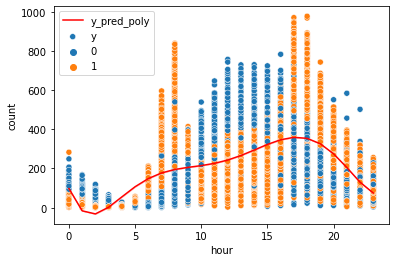

In [258]:
sns.scatterplot(x = bikes['hour'], y = y , label = 'y', hue=bikes['workingday'])
sns.lineplot(x = bikes['hour'], y = ypred_v1, label = 'y_pred_poly', color='red')

In [ ]:
p = PolynomialFeatures(degree=6, include_bias=False)

X_bs['ymd_inter']
p.fit(X_bs[['ymd_inter']])
Xpoly = p.transform(X_bs[['hour']])
p.get_feature_names()
df_poly = pd.DataFrame(Xpoly, columns = p.get_feature_names())
m.fit(Xpoly, y)
ypred_v1 = m.predict(Xpoly)
rmse = np.sqrt(mean_squared_error(y,ypred_v1))
r2 = r2_score(y,ypred_v1)
print(rmse, r2, m.score(Xpoly, y))

In [ ]:
# Year/Month/Day looks like a 4 degree polynom 

p = PolynomialFeatures(degree=6, include_bias=False)
bikes['year_month_day']
p.fit(bikes[['year', 'month', 'day', 'year'*'month']])
Xpoly = p.transform(bikes[['hour']])
p.get_feature_names()
df_poly = pd.DataFrame(Xpoly, columns = p.get_feature_names())
m.fit(Xpoly, y)
ypred_v1 = m.predict(Xpoly)
rmse = np.sqrt(mean_squared_error(y,ypred_v1))
r2 = r2_score(y,ypred_v1)
print(rmse, r2, m.score(Xpoly, y))



In [ ]:
# Year/Month/Day looks like a 4 degree polynom 



In [193]:
##Interaction Items 
### Hour and Weekday vs Hour and Workday --> people tend to use bike when they go and comeback from work
### Year, month and day together have a 3rd degree polinom shape (this reflects both yearly trend and seasonality)
### weather is not good to include because there is not much variety of information in it 
### season 1 is associated with , on average, lower humidity, lower temperature and higher windspeed 
### most likely atemp is correlated with temp, humidity and windspeed altogether 
### windspeed alone would not explain much of our target, but together with other weather conditions it might actually explain it
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datetime         10886 non-null  datetime64[ns]
 1   season           10886 non-null  int64         
 2   holiday          10886 non-null  int64         
 3   workingday       10886 non-null  int64         
 4   weather          10886 non-null  int64         
 5   temp             10886 non-null  float64       
 6   atemp            10886 non-null  float64       
 7   humidity         10886 non-null  int64         
 8   windspeed        10886 non-null  float64       
 9   count            10886 non-null  int64         
 10  day              10886 non-null  int64         
 11  weekday          10886 non-null  object        
 12  hour             10886 non-null  int64         
 13  week             10886 non-null  UInt32        
 14  month            10886 non-null  int64

In [203]:
#Hour* weekday vs Hour*Workingday 

y = bikes['count']
X_inter1 = bikes[['hour','workingday', 'weekday']]
pt = PolynomialFeatures(interaction_only=True)
p_features = pt.fit_transform(X_inter)
inter_hour = pd.DataFrame(p_features, columns=pt.get_feature_names())
inter_hour.head()


,1,x0,x1,x0 x1
0,1.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0
2,1.0,2.0,0.0,0.0
3,1.0,3.0,0.0,0.0
4,1.0,4.0,0.0,0.0


In [202]:
#windspeed * humidity * temp * season * weather 
y = bikes['count']
X_inter2 = bikes[['temp','atemp','windspeed','humidity', 'weather','season']]
pt = PolynomialFeatures(interaction_only=True)
p_features = pt.fit_transform(X_inter2)
inter_weather = pd.DataFrame(p_features, columns=pt.get_feature_names())
inter_weather.head()


,1,x0,x1,x2,x3,x4,x5,x0 x1,x0 x2,x0 x3,...,x1 x2,x1 x3,x1 x4,x1 x5,x2 x3,x2 x4,x2 x5,x3 x4,x3 x5,x4 x5
0,1.0,9.84,14.395,0.0,81.0,1.0,1.0,141.6468,0.0,797.04,...,0.0,1165.995,14.395,14.395,0.0,0.0,0.0,81.0,81.0,1.0
1,1.0,9.02,13.635,0.0,80.0,1.0,1.0,122.9877,0.0,721.60,...,0.0,1090.800,13.635,13.635,0.0,0.0,0.0,80.0,80.0,1.0
2,1.0,9.02,13.635,0.0,80.0,1.0,1.0,122.9877,0.0,721.60,...,0.0,1090.800,13.635,13.635,0.0,0.0,0.0,80.0,80.0,1.0
3,1.0,9.84,14.395,0.0,75.0,1.0,1.0,141.6468,0.0,738.00,...,0.0,1079.625,14.395,14.395,0.0,0.0,0.0,75.0,75.0,1.0
4,1.0,9.84,14.395,0.0,75.0,1.0,1.0,141.6468,0.0,738.00,...,0.0,1079.625,14.395,14.395,0.0,0.0,0.0,75.0,75.0,1.0


In [ ]:
ohc_features = ohc_features.rename(columns= {"1":"hour",
                                             "x0":"summer",
                                             "x1":"autumn",
                                             "x0x1":"winter",
                                             "x1_1":"good_weather",
                                             "x1_2":"cloudy_weather",
                                             "x1_3":"rainy_weather",
                                             "x1_4":"stormy_weather"})



bikes = bikes.join(y, how='outer')


ohc_features.head()
                                            
bikes = bikes.join(ohc_features, how='outer')
bikes.head()

In [ ]:
#X log transformations 
#Actually could be something sensible to do : 

In [213]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Linear Regression 
results_log = smf.ols('np.log(count)~ year + hour + temp + humidity + day + month', data=bikes).fit()
print(results_bs.summary())



/home/rita/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


LinAlgError: SVD did not converge

In [ ]:
### Correction 2: Transformation of Y , feature eng. some variables, Weighted Regression (fixes assumption 5)

In [43]:
#Log Transformation of y
import numpy as np

m = LinearRegression()
X_bs= bikes[['season','temp', 'humidity', 'hour', 'year']]
y = bikes['count']


m.fit(X_bs,np.log10(y))

ypred_ylog =m.predict(X_bs)
rmse_ylog = np.sqrt(mean_squared_error(y,ypred_ylog))
r2_ylog = r2_score(y,ypred_ylog)
print(round(rmse_ylog,4), round(r2_ylog,4))



262.0323 -1.0927


<AxesSubplot:xlabel='count', ylabel='Count'>

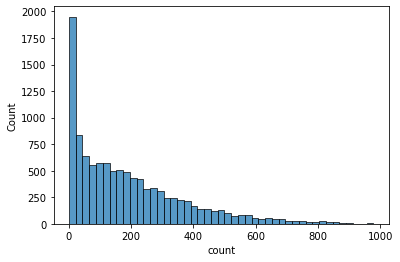

In [28]:
sns.histplot(data = bikes, x=bikes['count'])

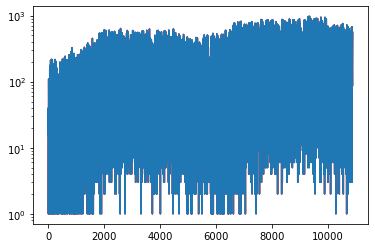

In [33]:
plt.yscale("log")
plt.plot(bikes['count'], color='red')
plt.plot(bikes['count'])

In [293]:
###Check if Scaled variables improved the model

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Linear Regression with statsmodel
results_std = smf.ols('np.log(count)~ year + month + autumn + rainy_weather + hour*workingday  + temp_scaled + humidity_scaled  ', data=bikes).fit()
print(results_std.summary())



                            OLS Regression Results                            
Dep. Variable:          np.log(count)   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1181.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        13:23:25   Log-Likelihood:                -16071.
No. Observations:               10886   AIC:                         3.216e+04
Df Residuals:                   10876   BIC:                         3.223e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -858.1910     41.116    -

In [300]:
# Regularization  : Ridge vs Lasso regressions # issues using the standardized X matrix 

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

m_ridge = Ridge(alpha=5.0)
m_lasso = Lasso(alpha=5.0)


y= np.log(bikes['count'])
X =bikes[['year','month','autumn','temp_scaled','rainy_weather','humidity_scaled', 'hour', 'hour_workingday_int']]


m_ridge.fit(X, y)  
m_lasso.fit(X, y)  
 
ypred_ridge = m_ridge.predict(X)
ypred_lasso = m_lasso.predict(X)

rmse_ridge = np.sqrt(mean_squared_error(y,ypred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y,ypred_lasso))

r2_ridge = r2_score(y,ypred_ridge)
r2_lasso = r2_score(y,ypred_lasso)

print(round(rmse_ridge,4), round(rmse_lasso,4),round(r2_ridge,4), round(r2_lasso,4) )

1.0657 1.422 0.4877 0.0879


In [299]:
# weighted regression in statsmodels

import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

#w is the standard deviation of residues 
model_fitted_y= results_bs.fittedvalues
w = model_fitted_y
bikes['hour_workingday_int'] = bikes['hour']*bikes['workingday']
mod_wls = sm.WLS(np.log(bikes['count']), bikes[['year','month','autumn','temp_scaled','rainy_weather','humidity_scaled', 'hour', 'hour_workingday_int']]
                 ,data=bikes
                 ,weights=1./(w ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())


                                 WLS Regression Results                                
Dep. Variable:                  count   R-squared (uncentered):                   0.923
Model:                            WLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                          1.621e+04
Date:                Fri, 10 Sep 2021   Prob (F-statistic):                        0.00
Time:                        14:21:44   Log-Likelihood:                         -18116.
No. Observations:               10886   AIC:                                  3.625e+04
Df Residuals:                   10878   BIC:                                  3.631e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [304]:
###WLS in sklearn

n_samples = 20

y= np.log(bikes['count'])

X = bikes[['year','month','autumn','temp_scaled','humidity_scaled', 'hour', 'hour_workingday_int']]


sample_weight = np.ones(n_samples) * 20
sample_weight[-2:] *= 30

X = X[:, np.newaxis, 2][:n_samples]
y = y[:n_samples]
p = X.argsort(axis=0)
X = X[p].reshape((n_samples, 1))
y = y[p]


#plt.scatter(X, y, s=sample_weight, c='grey', edgecolor='black')

# The unweighted model
regr = LinearRegression()
regr.fit(X, y)
#plt.plot(X, regr.predict(X), color='blue', linewidth=3, label='Unweighted model')

# The weighted model
regr = LinearRegression()
regr.fit(X, y, sample_weight)
w = np.ones(nsample)# residue variance 
#plt.plot(X, regr.predict(X), color='red', linewidth=3, label='Weighted model')

# The weighted model - scaled weights
regr = LinearRegression()
sample_weight = 1./(w ** 2)
regr.fit(X, y, sample_weight)
#plt.plot(X, regr.predict(X), color='yellow', linewidth=2, label='Weighted model - scaled', linestyle='dashed')
#plt.xticks(());plt.yticks(());plt.legend();

TypeError: '(slice(None, None, None), None, 2)' is an invalid key

In [225]:
bikes.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'day', 'weekday', 'hour',
       'week', 'month', 'year', 'spring', 'summer', 'autumn', 'winter',
       'good_weather', 'cloudy_weather', 'rainy_weather', 'stormy_weather',
       'low_temp', 'mild_temp', 'high_temp', 'low_atemp', 'mild_atemp',
       'high_atemp', 'low_humidity', 'medium_humidity', 'high_humidity',
       'low_windspeed', 'mild_windspeed', 'high_windspeed', 'temp_scaled',
       'atemp_scaled', 'humidity_scaled', 'windspeed_scaled'],
      dtype='object')

In [223]:
# Linear regression with sklearn
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


m = LinearRegression()
X = bikes[['season','temp_scaled', 'humidity_scaled', 'hour', 'year']]
y = bikes['count']

m.fit(X,np.log(y))

ypred =m.predict(X)
rmse = np.sqrt(mean_squared_error(y,ypred))
r2 = r2_score(y,ypred)
print(round(rmse_bs,4), round(r2_bs,4))

142.031 0.3852


In [ ]:
### Correction 3: Check Outliers 

In [ ]:
### Correction 4: Add seasonality dummy + add lags 

In [101]:
# Feature selection (double check):
# 1. Filter Methods: Correlation Matrix, VIF ## EDA preliminary analysis (see above)
# 2. Wrapper Methods: Forward/Backward feature Selection vs Recursive feature elimination 

#Forward Feature selection

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.api import OLS, add_constant
from sklearn.datasets import fetch_california_housing

# Create a list of features
forward_features = []

# Original features
feature_list = X_bs.columns

possible_models = pd.DataFrame(columns=['features', 'p', 'adj_r2'])
# Run a linear regression separately on each of the features

while len(feature_list) > 0:
    forward_selection = pd.DataFrame(columns=['features', 'p', 'adj_r2'])
    for feature in feature_list:
        m_feature = OLS(y, X_bs[forward_features + [feature]])
        result = m_feature.fit()
        forward_selection = forward_selection.append({
                                    'feature': feature
                                  , 'features': forward_features + [feature]
                                  , 'p': result.pvalues.loc[feature]
                                  , 'adj_r2': result.rsquared_adj}
                                  , ignore_index=True)

    if forward_selection.sort_values('p').iloc[0].p < 0.05:
        print(forward_selection.sort_values('p').iloc[0].features)
        best_feature = forward_selection.sort_values('p').iloc[0].feature
        forward_features.append(best_feature)
        feature_list = feature_list.drop(best_feature)
        best_model = forward_selection[forward_selection['feature']==best_feature]
        possible_models = possible_models.append(best_model, ignore_index=True)

    else:
        break

['season']
['season', 'temp']
['season', 'temp', 'hour']
['season', 'temp', 'hour', 'humidity']
['season', 'temp', 'hour', 'humidity', 'year']


In [102]:
forward_selection

,features,p,adj_r2,feature
0,"[season, temp, hour, humidity, year]",6.647293e-12,0.685568,year


In [103]:
possible_models

,features,p,adj_r2,feature
0,[season],0.000000e+00,0.503302,season
1,"[season, temp]",0.000000e+00,0.603037,temp
2,"[season, temp, hour]",8.262088e-296,0.649357,hour
3,"[season, temp, hour, humidity]",4.110750e-250,0.684232,humidity
4,"[season, temp, hour, humidity, year]",6.647293e-12,0.685568,year


In [93]:
# Recursive Feature Elimination 
from sklearn.feature_selection import RFE

m_sl = LinearRegression()        
m_sl.fit(X_bs, y)
rfe = RFE(m_sl)    #use for other regression models
rfe.fit(X_bs, y)

X_bs.columns

Index(['season', 'temp', 'humidity', 'hour', 'year'], dtype='object')

In [94]:
rfe.ranking_

array([1, 3, 4, 2, 1])

In [96]:
rfe.score(X_bs, y), m_sl.score(X_bs, y)

(0.09493265349617575, 0.3851683861484967)

In [97]:
from sklearn.model_selection import cross_val_score
cross_val_score(m_sl, X_bs, y).mean()

0.21839840431678886

In [98]:
cross_val_score(rfe, X_bs, y).mean()

-0.15810642717375

In [ ]:
# 3.Embeded Methods (ex: Regularization with Lasso or ElasticNet regressions)

In [176]:
##Scale data before Regularization 
X_std = pd.DataFrame(X.T)
#X_std
X_std.std(axis=1)

season       1.116174
temp         7.791590
humidity    19.245033
hour         6.915838
year         0.500019
dtype: float64

In [ ]:
#Creating a pipeline with all the transformations (if I have time)

In [303]:
# Hyperparameter Optimization + CROSS VALIDATION ---> Linear Reg, Poisson/BNeg, RandomForest 
# Grid Search vs Random Search 

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import pandas as pd

#bca = datasets.load_breast_cancer()
#X = bca.data[:,:2]  # only two features
#y = bca.target

svc = svm.SVC()

#First you define your hyperparameters
hyperparam_grid = {'C': [1, 10],
                   'kernel':['linear']
                   }
#Then you ask Grid Search algorithm to look for a better solution 

grid = GridSearchCV(svc,
        param_grid=hyperparam_grid,
        scoring='r2',
        n_jobs=1,
        cv=2,
        return_train_score=True
        )




In [302]:
grid.fit(X, y)
print("all scores      :")
print(pd.DataFrame(grid.cv_results_))

print("\nbest score      :", grid.best_score_)


/home/rita/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/rita/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/rita/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "/home/rita/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 553, in _validate_targets
    check_classification_targets(y)
  File "/home/rita/anaconda3/lib/python3.7/site-packages/sklearn/utils/multiclass.py", line 183, in check_classification_targets
    raise ValueError("Unknown label type: %r" % y_type)
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/home/rita/anaconda3/lib/python3.7/si

ValueError: Unknown label type: 'continuous'

In [182]:
#Examining the best set of values for the hyperparameters 
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
#Estimating the test performance
lr_best = grid_cv.best_estimator

cross_acc = cross_val_score(estimator=lr_best,   # estimator: # the model you want to evaluate 
                            X=Xtrain,         # the training input data 
                            y=ytrain,         # the training output data  
                            cv=5,          # number of cross validation datasets, k   
                            scoring='r2') # evaluation metric 


cross_acc
cross_acc.mean()


In [ ]:
#Calculating the test score with the best model

lr_best = grid_cv.best_estimator_
lr_best.score(Xtest,ytest)

lr_best.predict(Xtest,ytest)


In [ ]:
# Calculate RMSLE for bikes and bikes_test // Alternative models: LinearReg, Poisson/BNeg, RandomForest 
# Select the best model 
# ylog = np.log1p(y)
# ypred = np.exp(ypredlog)-1
# from sklearn.metrics import mean_squared_log_error
# np.sqrt(mean_squared_log_error(y, ypred))



In [ ]:
# Format data for Kaggle and Upload it
# Clean up Notebook and submit it on GitHub 

bike_results = pd.Dataframe()
bike_results['datetime'] = Xtest['datetime']# datetime from test data 
bike_results['count'] = lr_best.predict(Xtest,ytest) # Predicted counts using the best estimator 



In [ ]:
#####Friday Talk line of code: the WLS regression 





